In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Read the datasets

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### 2. check missing values

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### 3. Seperate X and Y

In [6]:
X = df.drop(columns=['TWF','HDF','PWF','OSF','RNF','Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,L50096,L,300.6,309.6,1596,36.1,140
1,1,M20343,M,302.6,312.1,1759,29.1,200
2,2,L49454,L,299.3,308.5,1805,26.5,25
3,3,L53355,L,301.0,310.9,1524,44.3,197
4,4,M24050,M,298.0,309.0,1641,35.4,34


### 4. Cat Con Seperation 

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Product ID', 'Type']

In [10]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### 5. Create Sklearn pipeline for feature selection (Ordinal)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811e+00,  3.95880302e-01, -2.46230381e-01, ...,
         5.56416898e-01,  2.75200000e+03,  1.00000000e+00],
       [-1.73201272e+00,  1.46985559e+00,  1.55860483e+00, ...,
         1.49443273e+00,  8.62000000e+03,  2.00000000e+00],
       [-1.73198733e+00, -3.02203631e-01, -1.04035788e+00, ...,
        -1.24144677e+00,  2.34400000e+03,  1.00000000e+00],
       ...,
       [ 1.73198733e+00,  3.42181538e-01,  1.34202461e+00, ...,
         1.71330309e+00,  5.50200000e+03,  1.00000000e+00],
       [ 1.73201272e+00,  9.86566708e-01,  6.92283930e-01, ...,
        -9.75675621e-01,  5.02400000e+03,  1.00000000e+00],
       [ 1.73203811e+00, -1.59097397e+00, -1.32913151e+00, ...,
         1.94780704e+00,  1.45300000e+03,  1.00000000e+00]])

In [14]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'cat__Product ID',
       'cat__Type'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],cat__Product ID,cat__Type
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,2752.0,1.0
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,8620.0,2.0
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,2344.0,1.0
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,4704.0,1.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,9727.0,2.0


### 6. Find Mutual Info Scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([2.33171555e-05, 5.32788091e-03, 2.07796084e-03, 1.91827550e-02,
       1.98813580e-02, 6.77301363e-03, 1.84016522e-02, 1.05623397e-02])

In [17]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019881
num__Rotational speed [rpm]     0.019183
cat__Product ID                 0.018402
cat__Type                       0.010562
num__Tool wear [min]            0.006773
num__Air temperature [K]        0.005328
num__Process temperature [K]    0.002078
num__id                         0.000023
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

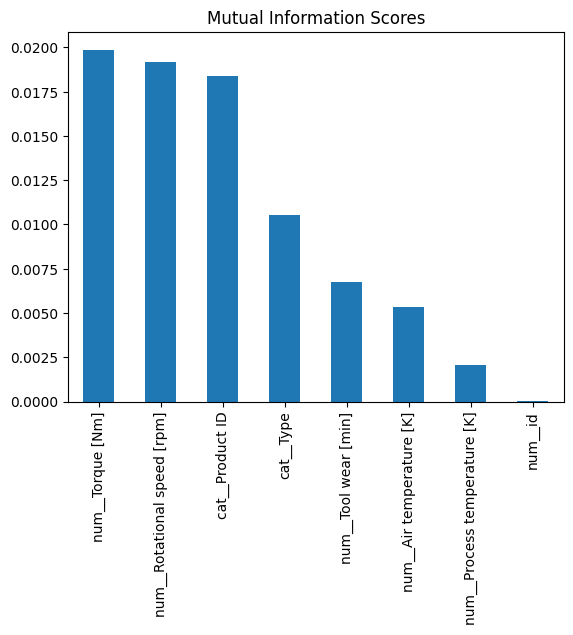

In [18]:
mi.plot(kind='bar', title='Mutual Information Scores')

In [19]:
sel_cols = list(mi[0:7].index)
sel_cols

['num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'cat__Product ID',
 'cat__Type',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]']

In [20]:
# Approach 2 select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=7)
sel_feature = sel.fit_transform(X_pre, Y)

In [21]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'cat__Product ID', 'cat__Type'],
      dtype=object)

In [22]:
sel_cols[0].split('__')[1]

'Air temperature [K]'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Product ID',
 'Type']

In [25]:
X_sel = X[imp_cols]

In [26]:
X_sel

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Product ID,Type
0,300.6,309.6,1596,36.1,140,L50096,L
1,302.6,312.1,1759,29.1,200,M20343,M
2,299.3,308.5,1805,26.5,25,L49454,L
3,301.0,310.9,1524,44.3,197,L53355,L
4,298.0,309.0,1641,35.4,34,M24050,M
...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,M22284,M
136425,297.5,308.5,1447,49.1,2,H38017,H
136426,300.5,311.8,1524,38.5,214,L54690,L
136427,301.7,310.9,1447,46.3,42,L53876,L


In [27]:
## Cat , con for Selected features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat_sel

['Product ID', 'Type']

In [29]:
con_sel

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### 7. Build the final sklearn pipeline (Onehotencoder)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [32]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', ..., 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [34]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],cat__Product ID_H29424,cat__Product ID_H29425,cat__Product ID_H29432,cat__Product ID_H29434,cat__Product ID_H29441,...,cat__Product ID_M24846,cat__Product ID_M24847,cat__Product ID_M24849,cat__Product ID_M24851,cat__Product ID_M24855,cat__Product ID_M24857,cat__Product ID_M24859,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
